In [1]:
from herbie import Herbie
import numpy as np


# pull data, place into xarray
H = Herbie(
    "2025-01-10",
    model="hrrr",
    product="sfc",
    fxx=0,
)

ds = H.xarray(r"COLMD|MASSDEN")
display(ds[0].info)
display(ds[1].info)

i = [a for a in ds[0].data_vars]
print(i)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jan-10 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.


/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


<bound method Dataset.info of <xarray.Dataset> Size: 38MB
Dimensions:                (y: 1059, x: 1799)
Coordinates:
    time                   datetime64[ns] 8B 2025-01-10
    step                   timedelta64[ns] 8B 00:00:00
    atmosphereSingleLayer  float64 8B 0.0
    latitude               (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude              (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time             datetime64[ns] 8B 2025-01-10
    gribfile_projection    object 8B None
Dimensions without coordinates: y, x
Data variables:
    unknown                (y, x) float32 8MB 2.5e-06 2.5e-06 ... 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    

<bound method Dataset.info of <xarray.Dataset> Size: 38MB
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2025-01-10
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 8.0
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2025-01-10
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    mdens                (y, x) float32 8MB 1.52e-09 1.52e-09 ... 8.855e-26
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:  

['unknown']


It's better to get COLMD and MASSDEN separately, because they can't be bundled into the same Dataset due to different height boundaries:
-  COLMD: atmosphereSingleLayer  float64 8B 0.0
-  MASSDEN: heightAboveGround    float64 8B 8.0

Scrubbing the metadata may be an option, but keeping them separate is easier. But that does mean an extra 30MB of space used per file due to lat/lon

In [2]:
ds[0] = ds[0].drop_vars('atmosphereSingleLayer')
ds[1] = ds[1].drop_vars('heightAboveGround')
ds

[<xarray.Dataset> Size: 38MB
 Dimensions:              (y: 1059, x: 1799)
 Coordinates:
     time                 datetime64[ns] 8B 2025-01-10
     step                 timedelta64[ns] 8B 00:00:00
     latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
     longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
     valid_time           datetime64[ns] 8B 2025-01-10
     gribfile_projection  object 8B None
 Dimensions without coordinates: y, x
 Data variables:
     unknown              (y, x) float32 8MB 2.5e-06 2.5e-06 2.5e-06 ... 0.0 0.0
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             kwbc
     GRIB_centreDescription:  US National Weather Service - NCEP
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             US National Weather Service - NCEP
     model:                   hrrr
     product:                 sfc
     description:             High-Resolution Rapid Refresh - C

In [3]:
ds = ds[1].assign(colmd=ds[0].unknown)
ds

<xarray.Dataset> Size: 46MB
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2025-01-10
    step                 timedelta64[ns] 8B 00:00:00
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2025-01-10
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    mdens                (y, x) float32 8MB 1.52e-09 1.52e-09 ... 8.855e-26
    colmd                (y, x) float32 8MB 2.5e-06 2.5e-06 2.5e-06 ... 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/mgraca/data/hrrr/20250110/subset_d9efb480_...
    search:                  COLMD|MASSDEN

In [4]:
ds.info

<bound method Dataset.info of <xarray.Dataset> Size: 46MB
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2025-01-10
    step                 timedelta64[ns] 8B 00:00:00
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2025-01-10
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    mdens                (y, x) float32 8MB 1.52e-09 1.52e-09 ... 8.855e-26
    colmd                (y, x) float32 8MB 2.5e-06 2.5e-06 2.5e-06 ... 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product

I'd rather not refactor because I'm pretty sure that if we were to use the grib files and perform subregion, we'd have to save the original grib files anyways, resulting in no change. Since they're not the same level, we'd get two grib files anyways I think.

In [5]:
# python nonsense that allows you to import from sibling directories
import sys
sys.path.append("..")

# define bounding box
lat_bottom, lat_top = 33.9, 34.2
lon_bottom, lon_top = -118.4, -118.0
extent = (lon_bottom, lon_top, lat_bottom, lat_top)

# input data shape
dim = 200
frames_per_sample = 5

# date range of data
start_date, end_date = "2025-01-10-00", "2025-01-10-04"

from libs.hrrrdata import HRRRData
HD_COLMD = HRRRData(
    start_date=start_date,
    end_date=end_date,
    extent=extent,
    extent_name='la_region2',
    product='COLMD',
    frames_per_sample=frames_per_sample,
    dim=dim,
    verbose=True
)

HD_MDENS = HRRRData(
    start_date=start_date,
    end_date=end_date,
    extent=extent,
    extent_name='la_region2',
    product='MASSDEN',
    frames_per_sample=frames_per_sample,
    dim=dim,
    verbose=True
)

▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 00:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 01:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 02:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 03:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 04:00 UTC F00 ┊ source=aws


Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_d9ef105b__hrrr.t00z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_87ef105b__hrrr.t01z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_03ef105b__hrrr.t02z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_64ef105b__hrrr.t03z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_10ef105b__hrrr.t04z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_d9ef9dd4__hrrr.t00z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_87ef9dd4__hrrr.t01z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file


▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 00:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 01:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 02:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 03:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 04:00 UTC F00 ┊ source=aws


Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_03ef9dd4__hrrr.t02z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_64ef9dd4__hrrr.t03z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_10ef9dd4__hrrr.t04z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file


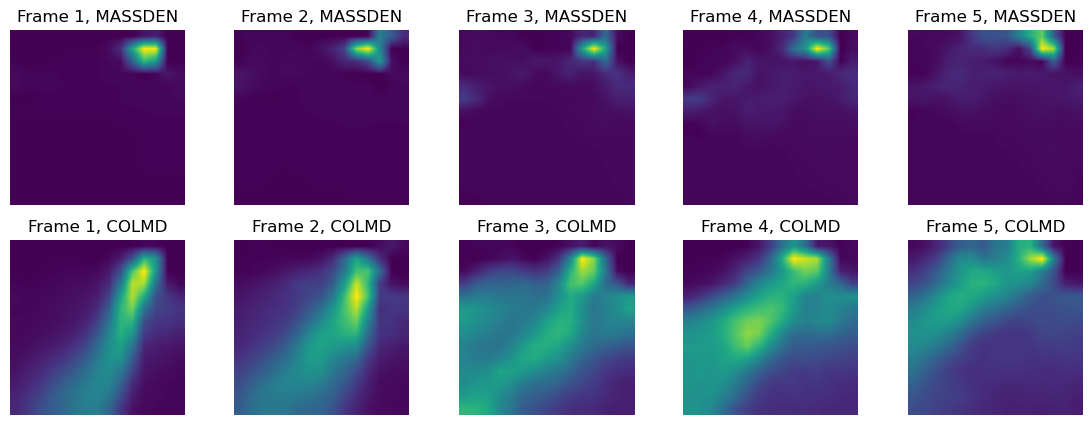

In [8]:
import matplotlib.pyplot as plt
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(2, 5, figsize=(14, 5))

# Plot each of the sequential images for one random data example.
# plot hrrr channel
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(HD_MDENS.data[0, idx, :, :, 0]))
    ax.set_title(f"Frame {idx + 1}, MASSDEN")
    ax.axis("off")
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(HD_COLMD.data[0, idx, :, :, 0]))
    ax.set_title(f"Frame {idx + 1}, COLMD")
    ax.axis("off")

plt.show()

In [9]:
HD_MDENS.data[0, 0, :, :, 0]

array([[4.00000005e-10, 4.00000005e-10, 4.00000005e-10, ...,
        2.80000001e-09, 2.80000001e-09, 2.80000001e-09],
       [4.00000005e-10, 4.00000005e-10, 4.00000005e-10, ...,
        2.80000001e-09, 2.80000001e-09, 2.80000001e-09],
       [4.00000005e-10, 4.00000005e-10, 4.00000005e-10, ...,
        2.80000001e-09, 2.80000001e-09, 2.80000001e-09],
       ...,
       [1.80799997e-08, 1.80799997e-08, 1.80799997e-08, ...,
        2.00799999e-08, 2.00799999e-08, 2.00799999e-08],
       [1.80799997e-08, 1.80799997e-08, 1.80799997e-08, ...,
        2.00799999e-08, 2.00799999e-08, 2.00799999e-08],
       [1.80799997e-08, 1.80799997e-08, 1.80799997e-08, ...,
        2.00799999e-08, 2.00799999e-08, 2.00799999e-08]])

In [10]:
HD_COLMD.data[0, 0, :, :, 0]

array([[2.00000002e-07, 2.00000002e-07, 2.00000002e-07, ...,
        9.99999997e-07, 9.99999997e-07, 9.99999997e-07],
       [2.00000002e-07, 2.00000002e-07, 2.00000002e-07, ...,
        9.99999997e-07, 9.99999997e-07, 9.99999997e-07],
       [2.00000002e-07, 2.00000002e-07, 2.00000002e-07, ...,
        9.99999997e-07, 9.99999997e-07, 9.99999997e-07],
       ...,
       [2.30999998e-04, 2.30999998e-04, 2.30999998e-04, ...,
        2.49999994e-05, 2.49999994e-05, 2.49999994e-05],
       [2.30999998e-04, 2.30999998e-04, 2.30999998e-04, ...,
        2.49999994e-05, 2.49999994e-05, 2.49999994e-05],
       [2.30999998e-04, 2.30999998e-04, 2.30999998e-04, ...,
        2.49999994e-05, 2.49999994e-05, 2.49999994e-05]])